In [50]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers.legacy import Adam

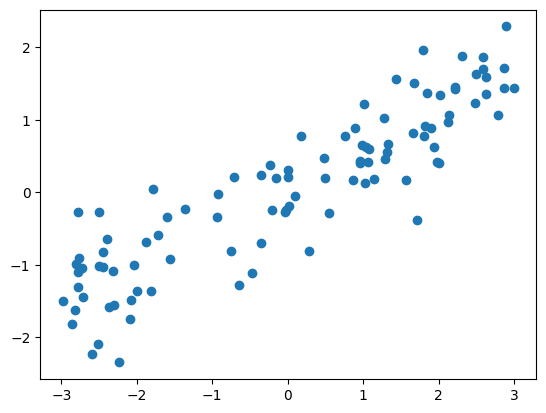

In [51]:
N = 100 # Number of inputs
X = np.random.random(N) * 6 - 3 # inputs
y = 0.5 * X + np.random.randn(N) * 0.5 # targets

plt.scatter(X, y) # plot the graph


In [52]:
# Build the model

i = Input(shape=(1,)) # one diemsional shape of input
x = Dense(1)(i) # does mx + c stuff, can be done by matricies

model = Model(i, x) # i is input x is output

In [53]:
model.summary() # none is a wild card --> can take any number of dimensions

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(
    loss='mse', # mean squared error (we can use built in or pass in a function like adam)
    optimizer=Adam(learning_rate=0.1), # flavour of gradient descent
    metrics=['mae'] # mean absolute error
)

In [55]:

r = model.fit(X.reshape(-1, 1),  # gradient descent process
          y,                 # inputs and targets first two parameters
          epochs=200,        # steps in gradient descent
          batch_size=32)     # how many data points are looked at at each step

Epoch 1/200
4/4 [==============================] - 0s 12ms/step - loss: 8.8063 - mae: 2.5991
Epoch 2/200
4/4 [==============================] - 0s 6ms/step - loss: 5.0959 - mae: 1.9637
Epoch 3/200
4/4 [==============================] - 0s 6ms/step - loss: 2.4577 - mae: 1.3474
Epoch 4/200
4/4 [==============================] - 0s 6ms/step - loss: 1.0312 - mae: 0.8281
Epoch 5/200
1/4 [======>.......................] - ETA: 0s - loss: 0.4986 - mae: 0.5586

2022-12-30 14:49:43.824997: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 6ms/step - loss: 0.3783 - mae: 0.4753
Epoch 6/200
4/4 [==============================] - 0s 7ms/step - loss: 0.3082 - mae: 0.4370
Epoch 7/200
4/4 [==============================] - 0s 6ms/step - loss: 0.3702 - mae: 0.5045
Epoch 8/200
4/4 [==============================] - 0s 6ms/step - loss: 0.4329 - mae: 0.5444
Epoch 9/200
4/4 [==============================] - 0s 6ms/step - loss: 0.4246 - mae: 0.5326
Epoch 10/200
4/4 [==============================] - 0s 6ms/step - loss: 0.3596 - mae: 0.4840
Epoch 11/200
4/4 [==============================] - 0s 6ms/step - loss: 0.2844 - mae: 0.4293
Epoch 12/200
4/4 [==============================] - 0s 6ms/step - loss: 0.2427 - mae: 0.3949
Epoch 13/200
4/4 [==============================] - 0s 7ms/step - loss: 0.2403 - mae: 0.3891
Epoch 14/200
4/4 [==============================] - 0s 6ms/step - loss: 0.2520 - mae: 0.3948
Epoch 15/200
4/4 [==============================] - 0s 6ms/step - loss: 0.2603 - mae: 0

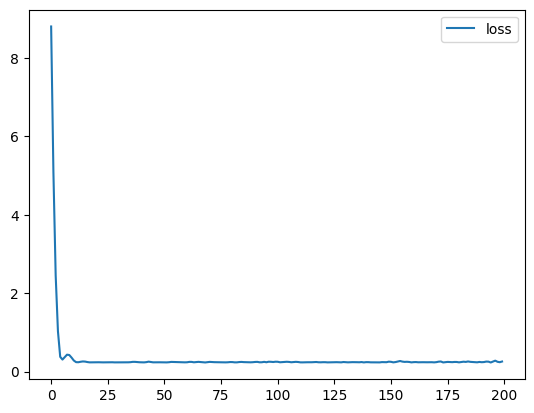

In [56]:
# Plot loss per iteration - you can also plot any metrics in the same way
plt.plot(r.history["loss"], label="loss")
plt.legend();

In [57]:
# Make predictions

Xtest = np.linspace(-3, 3, 20).reshape(-1, 1)
ptest = model.predict(Xtest)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 70ms/step


2022-12-30 14:53:02.818705: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


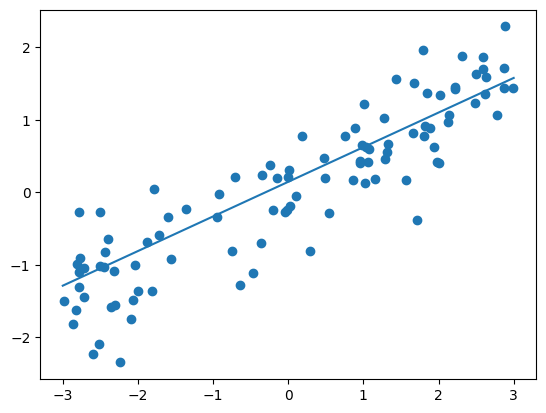

In [58]:
plt.scatter(X, y)
plt.plot(Xtest, ptest)

In [60]:
# Check parameters

model.layers


In [61]:
model.layers[1].get_weights()

[array([[0.47764543]], dtype=float32), array([0.14580058], dtype=float32)]